In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as o
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
dfzo = pd.read_excel(r'C:\Users\GabrielMedina\Documents\_housiSP\tabela_zona_oeste.xlsx')
display(dfzo)

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
0,1,2470084910,Zap Imóveis,Jaguaré,Zona Oeste,São Paulo,Aluguel,0,0,1100,40,1,0,0,1,27.50,7.003065,-1.559635,3.314186,-0.748028
1,2,2470281613,Zap Imóveis,Vila Romana,Zona Oeste,São Paulo,Aluguel,0,436,3000,120,3,0,1,0,25.00,8.006368,-0.197160,3.218876,-0.929289
2,3,2470329583,Zap Imóveis,Vila Sônia,Zona Oeste,São Paulo,Aluguel,348,2200,3500,130,3,3,3,3,26.92,8.160518,0.012175,3.292870,-0.788567
3,16,2471961576,Zap Imóveis,Brooklin,Zona Oeste,São Paulo,Aluguel,715,0,4000,139,1,0,1,1,28.78,8.294050,0.193510,3.359681,-0.661506
4,20,2472437314,Zap Imóveis,Cerqueira César,Zona Oeste,São Paulo,Aluguel,250,150,3500,110,2,0,1,2,31.82,8.160518,0.012175,3.460095,-0.470537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40866,227349,2473201481,Zap Imóveis,Vila Madalena,Zona Oeste,São Paulo,Aluguel,110,1381,3350,90,1,0,1,2,37.22,8.116716,-0.047308,3.616846,-0.172427
40867,227350,2467050881,Zap Imóveis,Pinheiros,Zona Oeste,São Paulo,Aluguel,200,963,2800,98,2,0,1,2,28.57,7.937375,-0.290852,3.352357,-0.675433
40868,227358,2466031374,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,0,134,1200,25,1,0,0,1,48.00,7.090077,-1.441474,3.871201,0.311307
40869,227359,2465099798,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,133,401,2200,82,2,0,0,2,26.83,7.696213,-0.618347,3.289521,-0.794936


In [3]:
dfzo = dfzo.drop(columns = ['Unnamed: 0'])
display(dfzo)

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
0,2470084910,Zap Imóveis,Jaguaré,Zona Oeste,São Paulo,Aluguel,0,0,1100,40,1,0,0,1,27.50,7.003065,-1.559635,3.314186,-0.748028
1,2470281613,Zap Imóveis,Vila Romana,Zona Oeste,São Paulo,Aluguel,0,436,3000,120,3,0,1,0,25.00,8.006368,-0.197160,3.218876,-0.929289
2,2470329583,Zap Imóveis,Vila Sônia,Zona Oeste,São Paulo,Aluguel,348,2200,3500,130,3,3,3,3,26.92,8.160518,0.012175,3.292870,-0.788567
3,2471961576,Zap Imóveis,Brooklin,Zona Oeste,São Paulo,Aluguel,715,0,4000,139,1,0,1,1,28.78,8.294050,0.193510,3.359681,-0.661506
4,2472437314,Zap Imóveis,Cerqueira César,Zona Oeste,São Paulo,Aluguel,250,150,3500,110,2,0,1,2,31.82,8.160518,0.012175,3.460095,-0.470537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40866,2473201481,Zap Imóveis,Vila Madalena,Zona Oeste,São Paulo,Aluguel,110,1381,3350,90,1,0,1,2,37.22,8.116716,-0.047308,3.616846,-0.172427
40867,2467050881,Zap Imóveis,Pinheiros,Zona Oeste,São Paulo,Aluguel,200,963,2800,98,2,0,1,2,28.57,7.937375,-0.290852,3.352357,-0.675433
40868,2466031374,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,0,134,1200,25,1,0,0,1,48.00,7.090077,-1.441474,3.871201,0.311307
40869,2465099798,Zap Imóveis,Perdizes,Zona Oeste,São Paulo,Aluguel,133,401,2200,82,2,0,0,2,26.83,7.696213,-0.618347,3.289521,-0.794936


In [4]:
dfzo.describe()

,Id_Oferta,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
count,4.087100e+04,4.087100e+04,4.087100e+04,4.087100e+04,40871.000000,40871.000000,40871.000000,40871.000000,40871.000000,40866.000000,40871.000000,40871.000000,40866.000000,40866.000000
mean,2.442899e+09,1.486935e+03,1.536075e+03,6.026876e+03,123.486164,2.284089,0.981821,1.683492,2.242470,53.069934,8.357033,0.279040,3.794768,0.165945
std,2.579056e+08,9.100210e+04,2.772862e+04,2.725059e+04,315.741647,0.901843,1.003999,1.786155,1.352314,183.475434,0.726290,0.986295,0.511352,0.972492
min,3.830122e+07,0.000000e+00,0.000000e+00,8.270000e+02,0.000000,1.000000,0.000000,0.000000,0.000000,0.060000,6.717805,-1.947016,-2.813411,-12.401524
25%,2.473271e+09,7.000000e+01,5.000000e+02,2.500000e+03,60.000000,2.000000,0.000000,1.000000,1.000000,32.260000,7.824046,-0.444751,3.473828,-0.444419
50%,2.483496e+09,2.200000e+02,8.900000e+02,3.800000e+03,90.000000,2.000000,1.000000,1.000000,2.000000,43.600000,8.242756,0.123854,3.775057,0.128460
75%,2.491632e+09,5.010000e+02,1.550000e+03,6.700000e+03,157.000000,3.000000,1.000000,2.000000,3.000000,61.820000,8.809863,0.893979,4.124227,0.792513
max,2.500724e+09,1.750021e+07,5.200074e+06,5.000000e+06,60000.000000,4.000000,12.000000,130.000000,30.000000,27777.780000,15.424948,9.877203,10.231992,12.408293


In [5]:
datazo = dfzo.groupby(['Zona', 'Bairro']).Aluguel_m2.agg(['max', 'min', 'mean', 'std', 'size'])
display(datazo)

max    min       mean         std  size
Zona       Bairro                                                             
Zona Oeste Alto da Lapa              80.00  10.00  36.196537   11.941121  1078
           Alto de Pinheiros        192.31   9.74  46.601156   19.407571  1116
           Barra Funda            12888.89   8.26  54.060189  353.781981  1320
           Bela Aliança              52.46  20.75  33.344255    7.243541    94
           Bela Vista               161.56  22.22  56.928633   19.862424   139
...                                    ...    ...        ...         ...   ...
           Vila Romana             2700.00  12.22  42.364404   81.163815  1099
           Vila Suzana              280.00   4.18  24.189119   19.631987   818
           Vila Sônia                75.00   7.74  26.627933    8.903705   416
           Várzea da Barra Funda    229.17  17.50  55.099355   26.547754    62
           Água Branca              121.79   9.73  45.073659   14.078982  1209

[66 rows x 5 columns]

In [6]:
dfzo.isna().any().sum()

3

In [7]:
dfzo.dropna(inplace=True)
dfzo.isna().any().sum()

0

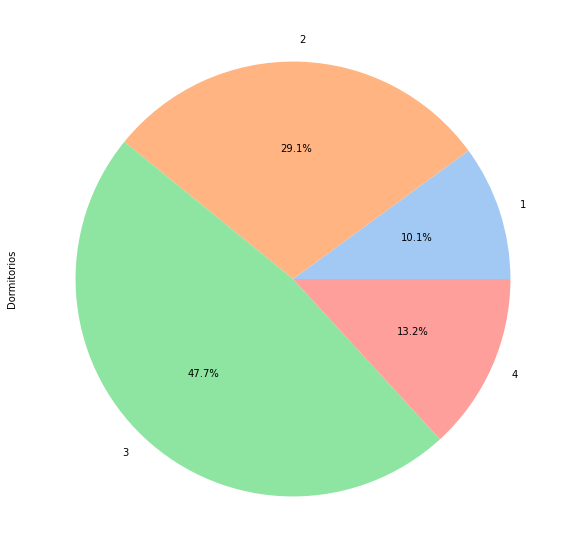

In [11]:
data = dfzo.groupby("Dormitorios")["Dormitorios"].sum()

colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(10,10))
data.plot.pie(colors = colors, autopct='%.1f%%')
plt.show()

In [8]:
# Coletando a mediana e o Q3 da tabela zona sul

mediana = np.percentile(dfzo.Aluguel_m2, 50)
q3 = np.percentile(dfzo.Aluguel_m2, 75)
print(mediana)
print(q3)

43.6
61.82


In [9]:
df___ = dfzo[(dfzo.Aluguel_m2 >= mediana) & (dfzo.Aluguel_m2 <= q3)]
print(df___)

        Id_Oferta       Portal             Bairro        Zona     Cidade  \
5      2472535672  Zap Imóveis  Alto de Pinheiros  Zona Oeste  São Paulo   
7      2472973378  Zap Imóveis        Sumarezinho  Zona Oeste  São Paulo   
17     2476075979  Zap Imóveis          Pinheiros  Zona Oeste  São Paulo   
31     2479305424  Zap Imóveis         Itaim Bibi  Zona Oeste  São Paulo   
33     2479613577  Zap Imóveis         Itaim Bibi  Zona Oeste  São Paulo   
...           ...          ...                ...         ...        ...   
40832  2500570903  Zap Imóveis     Vila Anastácio  Zona Oeste  São Paulo   
40855  2460786068  Zap Imóveis        Barra Funda  Zona Oeste  São Paulo   
40857  2460794759  Zap Imóveis       Alto da Lapa  Zona Oeste  São Paulo   
40861  2457261010  Zap Imóveis          Pinheiros  Zona Oeste  São Paulo   
40868  2466031374  Zap Imóveis           Perdizes  Zona Oeste  São Paulo   

        Status  Valor_Iptu  Valor_Condominio  Valor_Aluguel  Area_Privativa  \
5      A

In [12]:
df_o = pd.DataFrame(data=df___)
display(df_o)

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
5,2472535672,Zap Imóveis,Alto de Pinheiros,Zona Oeste,São Paulo,Aluguel,1139,0,15400,297,4,2,4,4,51.85,9.642123,2.024180,3.948355,0.458038
7,2472973378,Zap Imóveis,Sumarezinho,Zona Oeste,São Paulo,Aluguel,374,1600,5200,105,2,2,2,2,49.52,8.556414,0.549798,3.902377,0.370597
17,2476075979,Zap Imóveis,Pinheiros,Zona Oeste,São Paulo,Aluguel,145,1100,4500,90,3,1,1,3,50.00,8.411833,0.353458,3.912023,0.388942
31,2479305424,Zap Imóveis,Itaim Bibi,Zona Oeste,São Paulo,Aluguel,60,1000,4500,75,2,0,1,2,60.00,8.411833,0.353458,4.094345,0.735682
33,2479613577,Zap Imóveis,Itaim Bibi,Zona Oeste,São Paulo,Aluguel,0,1583,5000,100,2,2,2,2,50.00,8.517193,0.496536,3.912023,0.388942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40832,2500570903,Zap Imóveis,Vila Anastácio,Zona Oeste,São Paulo,Aluguel,0,513,2200,49,2,0,0,1,44.90,7.696213,-0.618347,3.804438,0.184336
40855,2460786068,Zap Imóveis,Barra Funda,Zona Oeste,São Paulo,Aluguel,42,1250,8000,162,3,1,2,2,49.38,8.987197,1.134797,3.899545,0.365212
40857,2460794759,Zap Imóveis,Alto da Lapa,Zona Oeste,São Paulo,Aluguel,380,1018,4300,95,3,1,1,2,45.26,8.366370,0.291720,3.812424,0.199523
40861,2457261010,Zap Imóveis,Pinheiros,Zona Oeste,São Paulo,Aluguel,250,1000,4500,80,2,1,1,2,56.25,8.411833,0.353458,4.029806,0.612943


In [37]:
#df_o.to_excel('C:/Users/GabrielMedina/Documents/_housiSP/med_q3_oeste.xlsx')

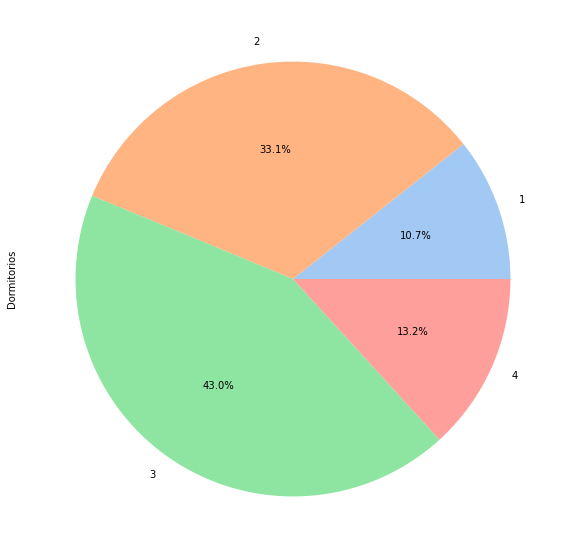

In [13]:
data = df_o.groupby("Dormitorios")["Dormitorios"].sum()

colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(10,10))
data.plot.pie(colors = colors, autopct='%.1f%%')
plt.show()

In [14]:
# Agrupando as métricas básicas dos Bairros da zona sul

datatable1 = df_o.groupby(['Zona', 'Bairro']).Aluguel_m2.agg(['min', 'max', 'mean', 'std', 'size'])
display(datatable1)

min    max       mean       std  \
Zona       Bairro                                                             
Zona Oeste Alto da Lapa                   43.75  61.67  51.198000  5.528722   
           Alto de Pinheiros              43.62  61.82  52.455653  4.585402   
           Barra Funda                    43.64  61.67  50.119981  4.882687   
           Bela Aliança                   43.75  52.46  45.200769  2.824888   
           Bela Vista                     44.00  61.54  57.158906  5.239988   
           Bom Retiro                     45.45  45.45  45.450000       NaN   
           Brooklin                       44.00  61.82  53.778605  5.770434   
           Brooklin Novo                  43.75  60.87  50.970000  4.245177   
           Butantã                        43.86  61.29  50.984620  5.101018   
           Cerqueira César                43.65  61.82  52.169538  5.029901   
           Cidade Monções                 45.71  61.80  54.913697  5.475560   
           Consolação                     43.75  61.11  51.853125  5.406188   
           Itaim Bibi                     43.69  61.76  51.142633  5.298159   
           Jaguaré                        43.65  53.06  46.727600  2.551787   
           Jardim Bonfiglioli             44.00  50.00  46.131429  2.270979   
           Jardim Esmeralda               44.00  45.00  44.500000  0.707107   
           Jardim Europa                  43.75  61.58  51.539362  5.123999   
           Jardim Leonor                  44.00  61.43  51.299070  4.938579   
           Jardim Londrina                43.75  47.37  45.325000  1.858700   
           Jardim Monte Kemel             44.12  50.00  47.420000  2.649189   
           Jardim Panorama                44.94  45.45  45.195000  0.360624   
           Jardim Paulista                43.61  61.80  51.949814  4.894001   
           Jardim Paulistano              44.00  61.42  52.111481  5.392207   
           Jardim das Acácias             46.46  58.33  51.887500  4.248242   
           Jardim das Bandeiras           46.15  60.00  53.080000  4.969926   
           Jardins                        43.61  61.72  53.364894  4.865915   
           Lapa                           43.64  61.71  48.811042  4.652753   
           Lapa de Baixo                  46.81  58.44  51.300000  6.251488   
           Moema                          45.00  59.89  50.080000  4.391495   
           Pacaembu                       45.00  60.78  49.815769  4.336233   
           Parque Industrial Tomas Edson  45.06  48.89  48.156250  1.333234   
           Perdizes                       43.60  61.82  51.104776  5.037178   
           Pinheiros                      43.62  61.80  51.951701  5.341564   
           Pompeia                        43.68  61.76  50.364452  4.933407   
           Real Parque                    45.83  48.19  46.773333  1.249173   
           Santa Cecilia                  43.64  60.78  56.812143  6.745499   
           Santa Cecília                  48.57  51.43  50.000000  2.022325   
           Sumarezinho                    43.75  61.32  50.794148  4.542697   
           Sumaré                         43.64  61.76  51.788711  5.029320   
           Vila Anastácio                 43.64  56.92  48.185636  3.895204   
           Vila Anglo Brasileira          43.96  59.78  51.041364  5.227994   
           Vila Butantã                   50.00  50.00  50.000000       NaN   
           Vila Cordeiro                  43.75  61.64  56.311176  4.808945   
           Vila Gertrudes                 43.68  61.82  57.346579  5.228027   
           Vila Hamburguesa               46.15  55.21  50.217143  3.401998   
           Vila Ipojuca                   43.75  59.52  50.115714  4.603518   
           Vila Leopoldina                43.61  61.76  49.422385  4.649497   
           Vila Madalena                  43.62  61.81  51.232772  5.357968   
           Vila Nova Conceição            45.00  61.77  53.781667  5.401932   
           Vila

In [15]:
# Tratando os NaN

datatable1.replace(np.nan, 0, inplace=True)
display(datatable1)

min    max       mean       std  \
Zona       Bairro                                                             
Zona Oeste Alto da Lapa                   43.75  61.67  51.198000  5.528722   
           Alto de Pinheiros              43.62  61.82  52.455653  4.585402   
           Barra Funda                    43.64  61.67  50.119981  4.882687   
           Bela Aliança                   43.75  52.46  45.200769  2.824888   
           Bela Vista                     44.00  61.54  57.158906  5.239988   
           Bom Retiro                     45.45  45.45  45.450000  0.000000   
           Brooklin                       44.00  61.82  53.778605  5.770434   
           Brooklin Novo                  43.75  60.87  50.970000  4.245177   
           Butantã                        43.86  61.29  50.984620  5.101018   
           Cerqueira César                43.65  61.82  52.169538  5.029901   
           Cidade Monções                 45.71  61.80  54.913697  5.475560   
           Consolação                     43.75  61.11  51.853125  5.406188   
           Itaim Bibi                     43.69  61.76  51.142633  5.298159   
           Jaguaré                        43.65  53.06  46.727600  2.551787   
           Jardim Bonfiglioli             44.00  50.00  46.131429  2.270979   
           Jardim Esmeralda               44.00  45.00  44.500000  0.707107   
           Jardim Europa                  43.75  61.58  51.539362  5.123999   
           Jardim Leonor                  44.00  61.43  51.299070  4.938579   
           Jardim Londrina                43.75  47.37  45.325000  1.858700   
           Jardim Monte Kemel             44.12  50.00  47.420000  2.649189   
           Jardim Panorama                44.94  45.45  45.195000  0.360624   
           Jardim Paulista                43.61  61.80  51.949814  4.894001   
           Jardim Paulistano              44.00  61.42  52.111481  5.392207   
           Jardim das Acácias             46.46  58.33  51.887500  4.248242   
           Jardim das Bandeiras           46.15  60.00  53.080000  4.969926   
           Jardins                        43.61  61.72  53.364894  4.865915   
           Lapa                           43.64  61.71  48.811042  4.652753   
           Lapa de Baixo                  46.81  58.44  51.300000  6.251488   
           Moema                          45.00  59.89  50.080000  4.391495   
           Pacaembu                       45.00  60.78  49.815769  4.336233   
           Parque Industrial Tomas Edson  45.06  48.89  48.156250  1.333234   
           Perdizes                       43.60  61.82  51.104776  5.037178   
           Pinheiros                      43.62  61.80  51.951701  5.341564   
           Pompeia                        43.68  61.76  50.364452  4.933407   
           Real Parque                    45.83  48.19  46.773333  1.249173   
           Santa Cecilia                  43.64  60.78  56.812143  6.745499   
           Santa Cecília                  48.57  51.43  50.000000  2.022325   
           Sumarezinho                    43.75  61.32  50.794148  4.542697   
           Sumaré                         43.64  61.76  51.788711  5.029320   
           Vila Anastácio                 43.64  56.92  48.185636  3.895204   
           Vila Anglo Brasileira          43.96  59.78  51.041364  5.227994   
           Vila Butantã                   50.00  50.00  50.000000  0.000000   
           Vila Cordeiro                  43.75  61.64  56.311176  4.808945   
           Vila Gertrudes                 43.68  61.82  57.346579  5.228027   
           Vila Hamburguesa               46.15  55.21  50.217143  3.401998   
           Vila Ipojuca                   43.75  59.52  50.115714  4.603518   
           Vila Leopoldina                43.61  61.76  49.422385  4.649497   
           Vila Madalena                  43.62  61.81  51.232772  5.357968   
           Vila Nova Conceição            45.00  61.77  53.781667  5.401932   
           Vila

In [17]:
data_pct = df_o.groupby('Dormitorios').agg(media =('Aluguel_m2', lambda p: p.mean())).round(2)
data_pct

,media
Dormitorios,
1,52.82
2,50.92
3,51.06
4,51.20


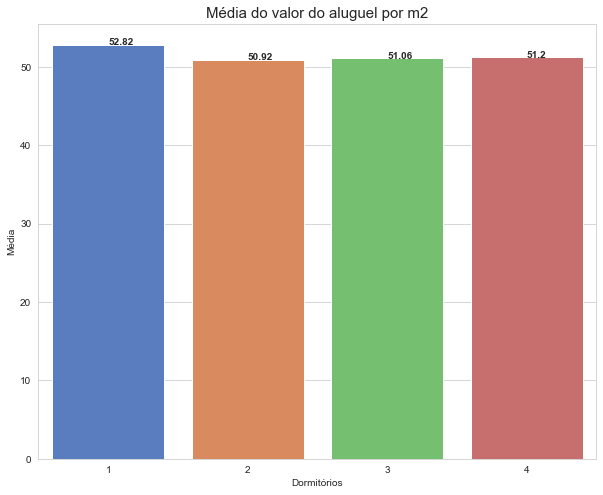

In [18]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x=data_pct.index, y='media', data=data_pct, ci=None, palette="muted",orient='v', )
ax.set_title("Média do valor do aluguel por m2", fontsize=15)
ax.set_xlabel ("Dormitórios")
ax.set_ylabel ("Média")
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),rect.get_height(), weight='bold' )


In [19]:
# Agrupando as métricas de acordo com os bairros e número de quartos (considerados de 4 para baixo)


datatable2 = df_o.groupby(['Zona', 'Bairro', 'Dormitorios']).Aluguel_m2.agg(['min', 'max', 'mean', 'std', 'size'])
display(datatable2)

min    max       mean  \
Zona       Bairro                Dormitorios                            
Zona Oeste Alto da Lapa          1            44.19  60.47  53.200952   
                                 2            43.75  61.67  50.690128   
                                 3            43.75  61.11  50.295571   
                                 4            45.71  60.45  52.442000   
           Alto de Pinheiros     1            43.97  60.47  51.397273   
...                                             ...    ...        ...   
           Várzea da Barra Funda 3            44.68  56.24  48.080000   
           Água Branca           1            43.73  61.29  53.636277   
                                 2            43.64  61.76  51.143155   
                                 3            44.12  61.48  52.371534   
                                 4            49.08  56.25  52.793333   

                                                   std  size  
Zona       Bairro                Dormitorios                  
Zona Oeste Alto da Lapa          1            5.464042    42  
                                 2            5.743451    78  
                                 3            5.154380    70  
                                 4            5.137515    15  
           Alto de Pinheiros     1            5.340219    11  
...                                                ...   ...  
           Várzea da Barra Funda 3            4.537907     8  
           Água Branca           1            4.521121   137  
                                 2            5.122547   187  
                                 3            4.844874   163  
                                 4            2.567455     9  

[183 rows x 5 columns]

In [20]:
# Tratando os NaN

datatable2.replace(np.nan, 0, inplace=True)
display(datatable2)

min    max       mean  \
Zona       Bairro                Dormitorios                            
Zona Oeste Alto da Lapa          1            44.19  60.47  53.200952   
                                 2            43.75  61.67  50.690128   
                                 3            43.75  61.11  50.295571   
                                 4            45.71  60.45  52.442000   
           Alto de Pinheiros     1            43.97  60.47  51.397273   
...                                             ...    ...        ...   
           Várzea da Barra Funda 3            44.68  56.24  48.080000   
           Água Branca           1            43.73  61.29  53.636277   
                                 2            43.64  61.76  51.143155   
                                 3            44.12  61.48  52.371534   
                                 4            49.08  56.25  52.793333   

                                                   std  size  
Zona       Bairro                Dormitorios                  
Zona Oeste Alto da Lapa          1            5.464042    42  
                                 2            5.743451    78  
                                 3            5.154380    70  
                                 4            5.137515    15  
           Alto de Pinheiros     1            5.340219    11  
...                                                ...   ...  
           Várzea da Barra Funda 3            4.537907     8  
           Água Branca           1            4.521121   137  
                                 2            5.122547   187  
                                 3            4.844874   163  
                                 4            2.567455     9  

[183 rows x 5 columns]

<AxesSubplot:ylabel='Frequency'>

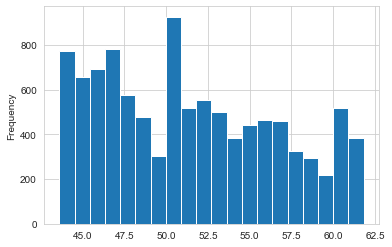

In [21]:
# Visualizando um Histograma simples

df_o['Aluguel_m2'].plot.hist(bins=20)

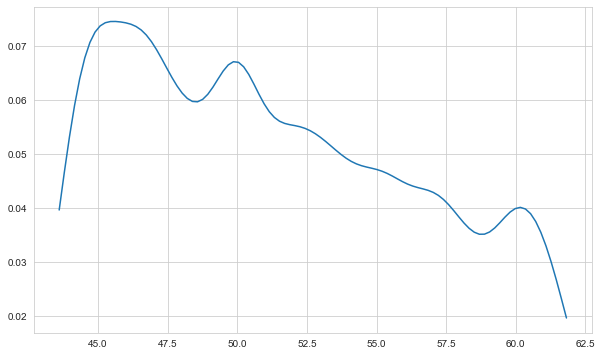

In [22]:
# KDE DA COLUNA DO ALUGUEL/M2

from scipy.stats.kde import gaussian_kde
from numpy import linspace

plt.figure(figsize=(10,6))
# estabelecendo os dados
data = df_o['Aluguel_m2']
# Criando o kernel a fim de estimar a probabilidade sobre os valores da array
kde = gaussian_kde(data)
# Valores sobre os quais o kernel será avaliado
dist_space = linspace(min(data), max(data), 100)
# plot da curva kde
plt.plot(dist_space, kde(dist_space))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Te

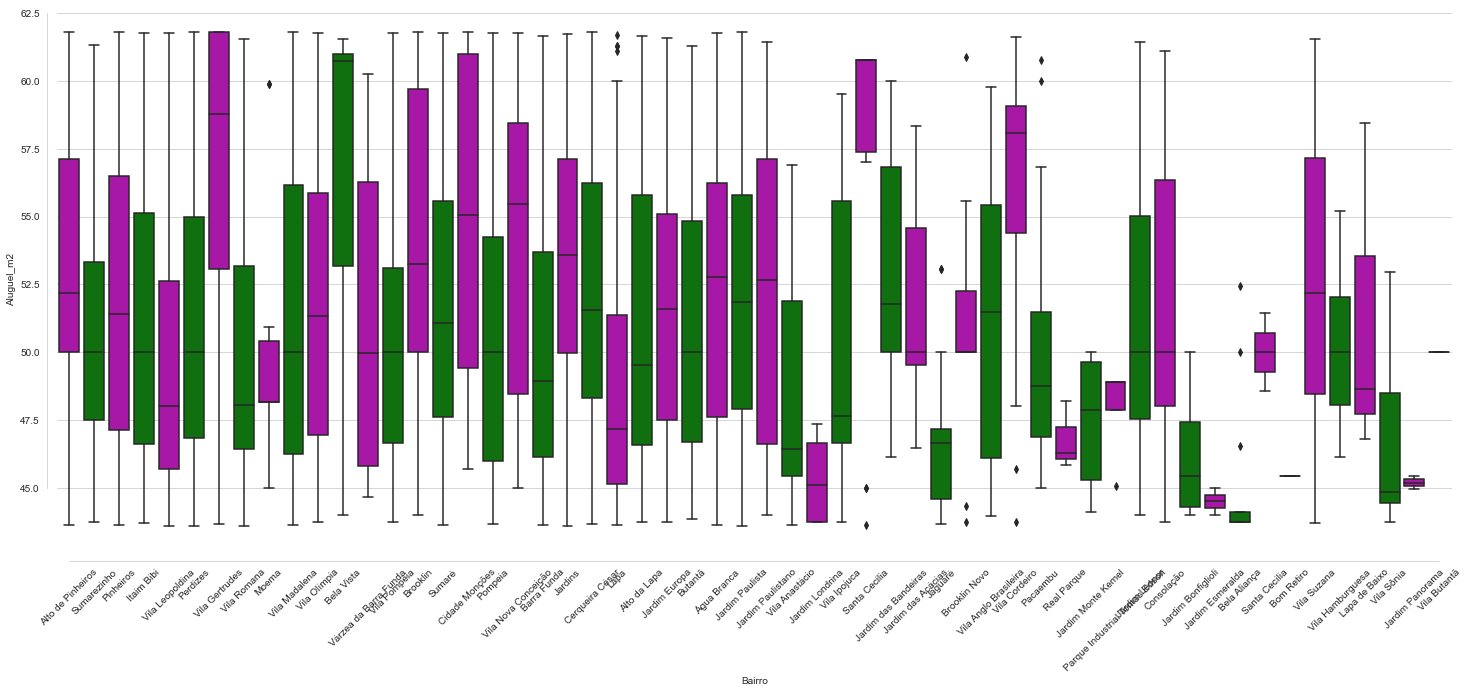

In [23]:
# Boxplot com os bairros e o algugeul por m2


plt.figure(figsize=(25,10))

sns.boxplot(x="Bairro", y="Aluguel_m2", palette=["m", "g"],
            data=df_o)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]),
 [Text(0, 0, 'Alto de Pinheiros'),
  Text(1, 0, 'Sumarezinho'),
  Text(2, 0, 'Pinheiros'),
  Text(3, 0, 'Itaim Bibi'),
  Text(4, 0, 'Vila Leopoldina'),
  Text(5, 0, 'Perdizes'),
  Text(6, 0, 'Vila Gertrudes'),
  Text(7, 0, 'Vila Romana'),
  Text(8, 0, 'Moema'),
  Text(9, 0, 'Vila Madalena'),
  Text(10, 0, 'Vila Olímpia'),
  Text(11, 0, 'Bela Vista'),
  Text(12, 0, 'Várzea da Barra Funda'),
  Text(13, 0, 'Vila Pompéia'),
  Text(14, 0, 'Brooklin'),
  Text(15, 0, 'Sumaré'),
  Text(16, 0, 'Cidade Monções'),
  Text(17, 0, 'Pompeia'),
  Text(18, 0, 'Vila Nova Conceição'),
  Text(19, 0, 'Barra Funda'),
  Text(20, 0, 'Jardins'),
  Text(21, 0, 'Cerqueira César'),
  Text(22, 0, 'Lapa'),
  Text(23, 0, 'Alto da Lapa'),
  Text(24, 0, 'Jardim Eur

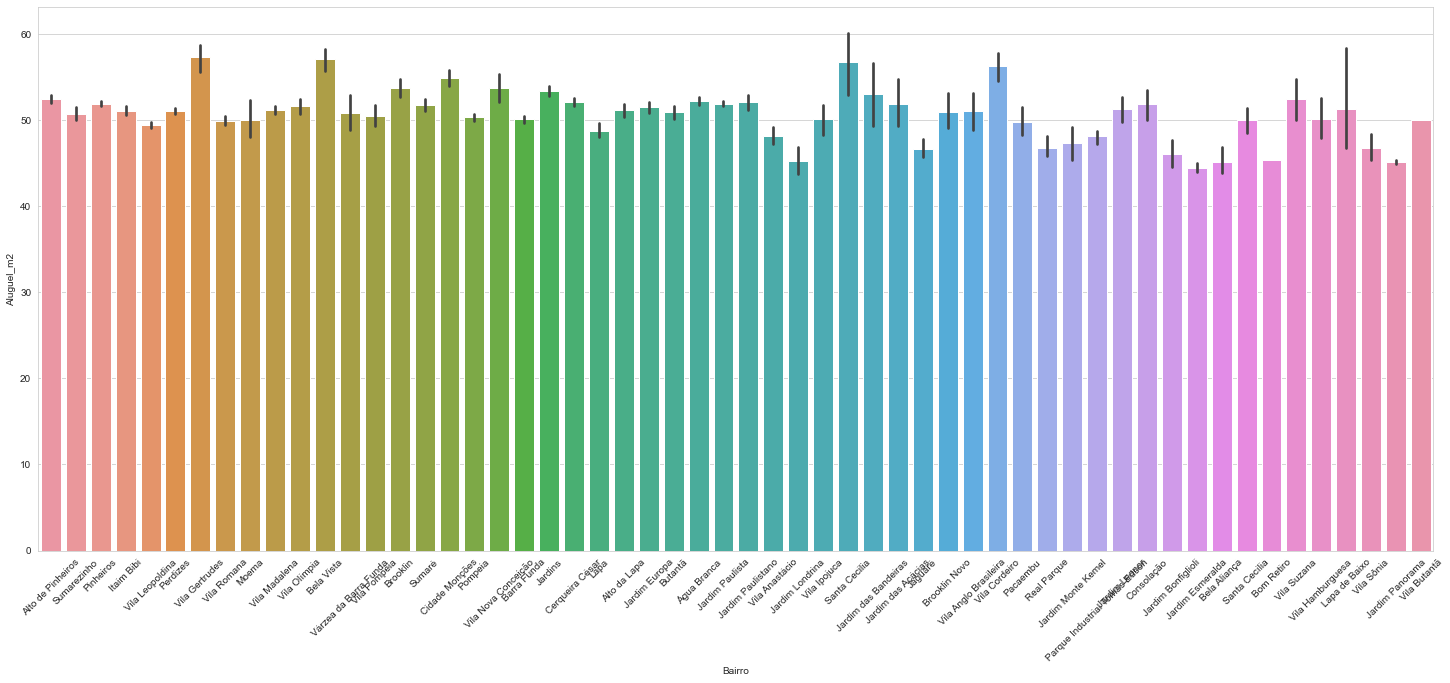

In [24]:
plt.figure(figsize=(25,10))
sns.barplot(x = df_o['Bairro'], y = df_o['Aluguel_m2'])
plt.xticks(rotation=45)

#    
#    
### Padronizando os valores para Log

<AxesSubplot:ylabel='Frequency'>

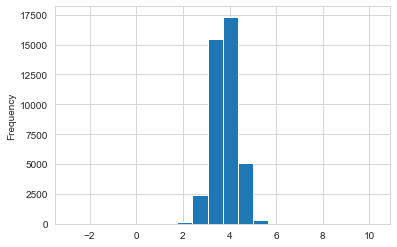

In [25]:
dfzo['log_Aluguel_m2'] = np.log(dfzo['Aluguel_m2'])
dfzo['log_Aluguel_m2'].plot.hist(bins=20)

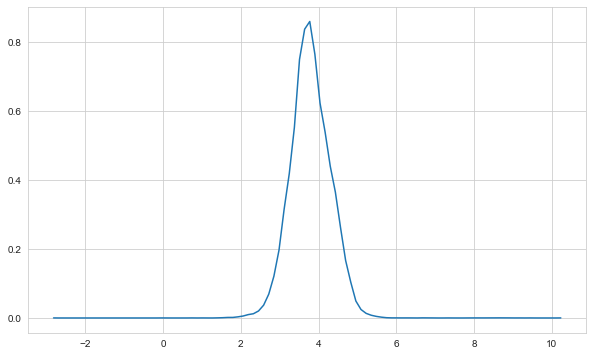

In [26]:
plt.figure(figsize=(10,6))
# estabelecendo os dados
data = dfzo['log_Aluguel_m2']
# Criando o kernel a fim de estimar a probabilidade sobre os valores da array
kde = gaussian_kde(data)
# Valores sobre os quais o kernel será avaliado
dist_space = linspace(min(data), max(data), 100)
# plot da curva kde
plt.plot(dist_space, kde(dist_space))

In [27]:
# definindo os dados
x_zo = dfzo['log_Aluguel_m2']
# calculando a média 
mu_zo = np.mean(x_zo)
# calculando o desvio=padrão (utilizando o padrão para o Python)
std_zo = np.std(x_zo)
print('Média Zona Sul: {}'.format(mu_zo))
print('Desvio Padrão Zona Sul: {}'.format(std_zo))

Média Zona Sul: 3.7947676723733643
Desvio Padrão Zona Sul: 0.5113455937759914


In [28]:
# Coletando a mediana e o Q3 da tabela zona sul

medianalog = np.percentile(dfzo.log_Aluguel_m2, 50)
q3log = np.percentile(dfzo.log_Aluguel_m2, 75)
print(medianalog)
print(q3log)

3.775057150354989
4.124226936703971


In [29]:
df_log = dfzo[(dfzo.log_Aluguel_m2 >= medianalog) & (dfzo.log_Aluguel_m2 <= q3log)]
print(df_log)

        Id_Oferta       Portal             Bairro        Zona     Cidade  \
5      2472535672  Zap Imóveis  Alto de Pinheiros  Zona Oeste  São Paulo   
7      2472973378  Zap Imóveis        Sumarezinho  Zona Oeste  São Paulo   
17     2476075979  Zap Imóveis          Pinheiros  Zona Oeste  São Paulo   
31     2479305424  Zap Imóveis         Itaim Bibi  Zona Oeste  São Paulo   
33     2479613577  Zap Imóveis         Itaim Bibi  Zona Oeste  São Paulo   
...           ...          ...                ...         ...        ...   
40832  2500570903  Zap Imóveis     Vila Anastácio  Zona Oeste  São Paulo   
40855  2460786068  Zap Imóveis        Barra Funda  Zona Oeste  São Paulo   
40857  2460794759  Zap Imóveis       Alto da Lapa  Zona Oeste  São Paulo   
40861  2457261010  Zap Imóveis          Pinheiros  Zona Oeste  São Paulo   
40868  2466031374  Zap Imóveis           Perdizes  Zona Oeste  São Paulo   

        Status  Valor_Iptu  Valor_Condominio  Valor_Aluguel  Area_Privativa  \
5      A

In [30]:
df_alog = pd.DataFrame(data=df_log)
display(df_alog)

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
5,2472535672,Zap Imóveis,Alto de Pinheiros,Zona Oeste,São Paulo,Aluguel,1139,0,15400,297,4,2,4,4,51.85,9.642123,2.024180,3.948355,0.458038
7,2472973378,Zap Imóveis,Sumarezinho,Zona Oeste,São Paulo,Aluguel,374,1600,5200,105,2,2,2,2,49.52,8.556414,0.549798,3.902377,0.370597
17,2476075979,Zap Imóveis,Pinheiros,Zona Oeste,São Paulo,Aluguel,145,1100,4500,90,3,1,1,3,50.00,8.411833,0.353458,3.912023,0.388942
31,2479305424,Zap Imóveis,Itaim Bibi,Zona Oeste,São Paulo,Aluguel,60,1000,4500,75,2,0,1,2,60.00,8.411833,0.353458,4.094345,0.735682
33,2479613577,Zap Imóveis,Itaim Bibi,Zona Oeste,São Paulo,Aluguel,0,1583,5000,100,2,2,2,2,50.00,8.517193,0.496536,3.912023,0.388942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40832,2500570903,Zap Imóveis,Vila Anastácio,Zona Oeste,São Paulo,Aluguel,0,513,2200,49,2,0,0,1,44.90,7.696213,-0.618347,3.804438,0.184336
40855,2460786068,Zap Imóveis,Barra Funda,Zona Oeste,São Paulo,Aluguel,42,1250,8000,162,3,1,2,2,49.38,8.987197,1.134797,3.899545,0.365212
40857,2460794759,Zap Imóveis,Alto da Lapa,Zona Oeste,São Paulo,Aluguel,380,1018,4300,95,3,1,1,2,45.26,8.366370,0.291720,3.812424,0.199523
40861,2457261010,Zap Imóveis,Pinheiros,Zona Oeste,São Paulo,Aluguel,250,1000,4500,80,2,1,1,2,56.25,8.411833,0.353458,4.029806,0.612943


In [31]:
# Agrupando as métricas básicas da tabela padronizada dos Bairros da zona sul para aluguel/m2

datatablelog1 = df_alog.groupby(['Zona', 'Bairro']).Aluguel_m2.agg(['min', 'max', 'mean', 'std', 'size'])
display(datatablelog1)

min    max       mean       std  \
Zona       Bairro                                                             
Zona Oeste Alto da Lapa                   43.75  61.67  51.198000  5.528722   
           Alto de Pinheiros              43.62  61.82  52.455653  4.585402   
           Barra Funda                    43.64  61.67  50.119981  4.882687   
           Bela Aliança                   43.75  52.46  45.200769  2.824888   
           Bela Vista                     44.00  61.54  57.158906  5.239988   
           Bom Retiro                     45.45  45.45  45.450000       NaN   
           Brooklin                       44.00  61.82  53.778605  5.770434   
           Brooklin Novo                  43.75  60.87  50.970000  4.245177   
           Butantã                        43.86  61.29  50.984620  5.101018   
           Cerqueira César                43.65  61.82  52.169538  5.029901   
           Cidade Monções                 45.71  61.80  54.913697  5.475560   
           Consolação                     43.75  61.11  51.853125  5.406188   
           Itaim Bibi                     43.69  61.76  51.142633  5.298159   
           Jaguaré                        43.65  53.06  46.727600  2.551787   
           Jardim Bonfiglioli             44.00  50.00  46.131429  2.270979   
           Jardim Esmeralda               44.00  45.00  44.500000  0.707107   
           Jardim Europa                  43.75  61.58  51.539362  5.123999   
           Jardim Leonor                  44.00  61.43  51.299070  4.938579   
           Jardim Londrina                43.75  47.37  45.325000  1.858700   
           Jardim Monte Kemel             44.12  50.00  47.420000  2.649189   
           Jardim Panorama                44.94  45.45  45.195000  0.360624   
           Jardim Paulista                43.61  61.80  51.949814  4.894001   
           Jardim Paulistano              44.00  61.42  52.111481  5.392207   
           Jardim das Acácias             46.46  58.33  51.887500  4.248242   
           Jardim das Bandeiras           46.15  60.00  53.080000  4.969926   
           Jardins                        43.61  61.72  53.364894  4.865915   
           Lapa                           43.64  61.71  48.811042  4.652753   
           Lapa de Baixo                  46.81  58.44  51.300000  6.251488   
           Moema                          45.00  59.89  50.080000  4.391495   
           Pacaembu                       45.00  60.78  49.815769  4.336233   
           Parque Industrial Tomas Edson  45.06  48.89  48.156250  1.333234   
           Perdizes                       43.60  61.82  51.104776  5.037178   
           Pinheiros                      43.62  61.80  51.951701  5.341564   
           Pompeia                        43.68  61.76  50.364452  4.933407   
           Real Parque                    45.83  48.19  46.773333  1.249173   
           Santa Cecilia                  43.64  60.78  56.812143  6.745499   
           Santa Cecília                  48.57  51.43  50.000000  2.022325   
           Sumarezinho                    43.75  61.32  50.794148  4.542697   
           Sumaré                         43.64  61.76  51.788711  5.029320   
           Vila Anastácio                 43.64  56.92  48.185636  3.895204   
           Vila Anglo Brasileira          43.96  59.78  51.041364  5.227994   
           Vila Butantã                   50.00  50.00  50.000000       NaN   
           Vila Cordeiro                  43.75  61.64  56.311176  4.808945   
           Vila Gertrudes                 43.68  61.82  57.346579  5.228027   
           Vila Hamburguesa               46.15  55.21  50.217143  3.401998   
           Vila Ipojuca                   43.75  59.52  50.115714  4.603518   
           Vila Leopoldina                43.61  61.76  49.422385  4.649497   
           Vila Madalena                  43.62  61.81  51.232772  5.357968   
           Vila Nova Conceição            45.00  61.77  53.781667  5.401932   
           Vila

In [32]:
datatablelog1.replace(np.nan, 0, inplace=True)
display(datatablelog1)

min    max       mean       std  \
Zona       Bairro                                                             
Zona Oeste Alto da Lapa                   43.75  61.67  51.198000  5.528722   
           Alto de Pinheiros              43.62  61.82  52.455653  4.585402   
           Barra Funda                    43.64  61.67  50.119981  4.882687   
           Bela Aliança                   43.75  52.46  45.200769  2.824888   
           Bela Vista                     44.00  61.54  57.158906  5.239988   
           Bom Retiro                     45.45  45.45  45.450000  0.000000   
           Brooklin                       44.00  61.82  53.778605  5.770434   
           Brooklin Novo                  43.75  60.87  50.970000  4.245177   
           Butantã                        43.86  61.29  50.984620  5.101018   
           Cerqueira César                43.65  61.82  52.169538  5.029901   
           Cidade Monções                 45.71  61.80  54.913697  5.475560   
           Consolação                     43.75  61.11  51.853125  5.406188   
           Itaim Bibi                     43.69  61.76  51.142633  5.298159   
           Jaguaré                        43.65  53.06  46.727600  2.551787   
           Jardim Bonfiglioli             44.00  50.00  46.131429  2.270979   
           Jardim Esmeralda               44.00  45.00  44.500000  0.707107   
           Jardim Europa                  43.75  61.58  51.539362  5.123999   
           Jardim Leonor                  44.00  61.43  51.299070  4.938579   
           Jardim Londrina                43.75  47.37  45.325000  1.858700   
           Jardim Monte Kemel             44.12  50.00  47.420000  2.649189   
           Jardim Panorama                44.94  45.45  45.195000  0.360624   
           Jardim Paulista                43.61  61.80  51.949814  4.894001   
           Jardim Paulistano              44.00  61.42  52.111481  5.392207   
           Jardim das Acácias             46.46  58.33  51.887500  4.248242   
           Jardim das Bandeiras           46.15  60.00  53.080000  4.969926   
           Jardins                        43.61  61.72  53.364894  4.865915   
           Lapa                           43.64  61.71  48.811042  4.652753   
           Lapa de Baixo                  46.81  58.44  51.300000  6.251488   
           Moema                          45.00  59.89  50.080000  4.391495   
           Pacaembu                       45.00  60.78  49.815769  4.336233   
           Parque Industrial Tomas Edson  45.06  48.89  48.156250  1.333234   
           Perdizes                       43.60  61.82  51.104776  5.037178   
           Pinheiros                      43.62  61.80  51.951701  5.341564   
           Pompeia                        43.68  61.76  50.364452  4.933407   
           Real Parque                    45.83  48.19  46.773333  1.249173   
           Santa Cecilia                  43.64  60.78  56.812143  6.745499   
           Santa Cecília                  48.57  51.43  50.000000  2.022325   
           Sumarezinho                    43.75  61.32  50.794148  4.542697   
           Sumaré                         43.64  61.76  51.788711  5.029320   
           Vila Anastácio                 43.64  56.92  48.185636  3.895204   
           Vila Anglo Brasileira          43.96  59.78  51.041364  5.227994   
           Vila Butantã                   50.00  50.00  50.000000  0.000000   
           Vila Cordeiro                  43.75  61.64  56.311176  4.808945   
           Vila Gertrudes                 43.68  61.82  57.346579  5.228027   
           Vila Hamburguesa               46.15  55.21  50.217143  3.401998   
           Vila Ipojuca                   43.75  59.52  50.115714  4.603518   
           Vila Leopoldina                43.61  61.76  49.422385  4.649497   
           Vila Madalena                  43.62  61.81  51.232772  5.357968   
           Vila Nova Conceição            45.00  61.77  53.781667  5.401932   
           Vila

In [33]:
# Agrupando as métricas de acordo com os bairros e número de quartos (considerados de 4 para baixo)


datatablelog2 = df_alog.groupby(['Zona', 'Bairro', 'Dormitorios']).Aluguel_m2.agg(['min', 'max', 'mean', 'std', 'size'])
display(datatablelog2)

min    max       mean  \
Zona       Bairro                Dormitorios                            
Zona Oeste Alto da Lapa          1            44.19  60.47  53.200952   
                                 2            43.75  61.67  50.690128   
                                 3            43.75  61.11  50.295571   
                                 4            45.71  60.45  52.442000   
           Alto de Pinheiros     1            43.97  60.47  51.397273   
...                                             ...    ...        ...   
           Várzea da Barra Funda 3            44.68  56.24  48.080000   
           Água Branca           1            43.73  61.29  53.636277   
                                 2            43.64  61.76  51.143155   
                                 3            44.12  61.48  52.371534   
                                 4            49.08  56.25  52.793333   

                                                   std  size  
Zona       Bairro                Dormitorios                  
Zona Oeste Alto da Lapa          1            5.464042    42  
                                 2            5.743451    78  
                                 3            5.154380    70  
                                 4            5.137515    15  
           Alto de Pinheiros     1            5.340219    11  
...                                                ...   ...  
           Várzea da Barra Funda 3            4.537907     8  
           Água Branca           1            4.521121   137  
                                 2            5.122547   187  
                                 3            4.844874   163  
                                 4            2.567455     9  

[183 rows x 5 columns]

In [34]:
datatablelog2.replace(np.nan, 0, inplace=True)
display(datatablelog2)

min    max       mean  \
Zona       Bairro                Dormitorios                            
Zona Oeste Alto da Lapa          1            44.19  60.47  53.200952   
                                 2            43.75  61.67  50.690128   
                                 3            43.75  61.11  50.295571   
                                 4            45.71  60.45  52.442000   
           Alto de Pinheiros     1            43.97  60.47  51.397273   
...                                             ...    ...        ...   
           Várzea da Barra Funda 3            44.68  56.24  48.080000   
           Água Branca           1            43.73  61.29  53.636277   
                                 2            43.64  61.76  51.143155   
                                 3            44.12  61.48  52.371534   
                                 4            49.08  56.25  52.793333   

                                                   std  size  
Zona       Bairro                Dormitorios                  
Zona Oeste Alto da Lapa          1            5.464042    42  
                                 2            5.743451    78  
                                 3            5.154380    70  
                                 4            5.137515    15  
           Alto de Pinheiros     1            5.340219    11  
...                                                ...   ...  
           Várzea da Barra Funda 3            4.537907     8  
           Água Branca           1            4.521121   137  
                                 2            5.122547   187  
                                 3            4.844874   163  
                                 4            2.567455     9  

[183 rows x 5 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Te

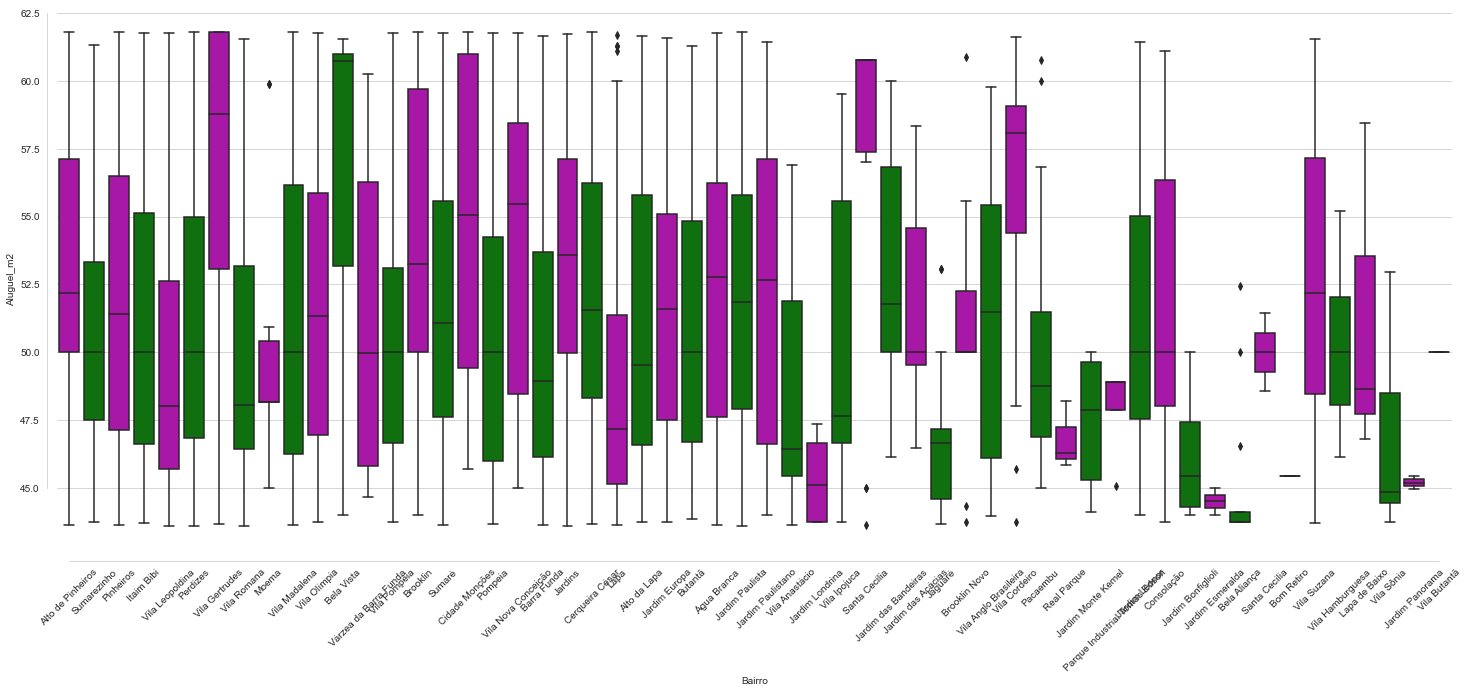

In [35]:
# Boxplot com os bairros e o algugeul por m2


plt.figure(figsize=(25,10))

sns.boxplot(x="Bairro", y="Aluguel_m2", palette=["m", "g"],
            data=df_alog)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]),
 [Text(0, 0, 'Alto de Pinheiros'),
  Text(1, 0, 'Sumarezinho'),
  Text(2, 0, 'Pinheiros'),
  Text(3, 0, 'Itaim Bibi'),
  Text(4, 0, 'Vila Leopoldina'),
  Text(5, 0, 'Perdizes'),
  Text(6, 0, 'Vila Gertrudes'),
  Text(7, 0, 'Vila Romana'),
  Text(8, 0, 'Moema'),
  Text(9, 0, 'Vila Madalena'),
  Text(10, 0, 'Vila Olímpia'),
  Text(11, 0, 'Bela Vista'),
  Text(12, 0, 'Várzea da Barra Funda'),
  Text(13, 0, 'Vila Pompéia'),
  Text(14, 0, 'Brooklin'),
  Text(15, 0, 'Sumaré'),
  Text(16, 0, 'Cidade Monções'),
  Text(17, 0, 'Pompeia'),
  Text(18, 0, 'Vila Nova Conceição'),
  Text(19, 0, 'Barra Funda'),
  Text(20, 0, 'Jardins'),
  Text(21, 0, 'Cerqueira César'),
  Text(22, 0, 'Lapa'),
  Text(23, 0, 'Alto da Lapa'),
  Text(24, 0, 'Jardim Eur

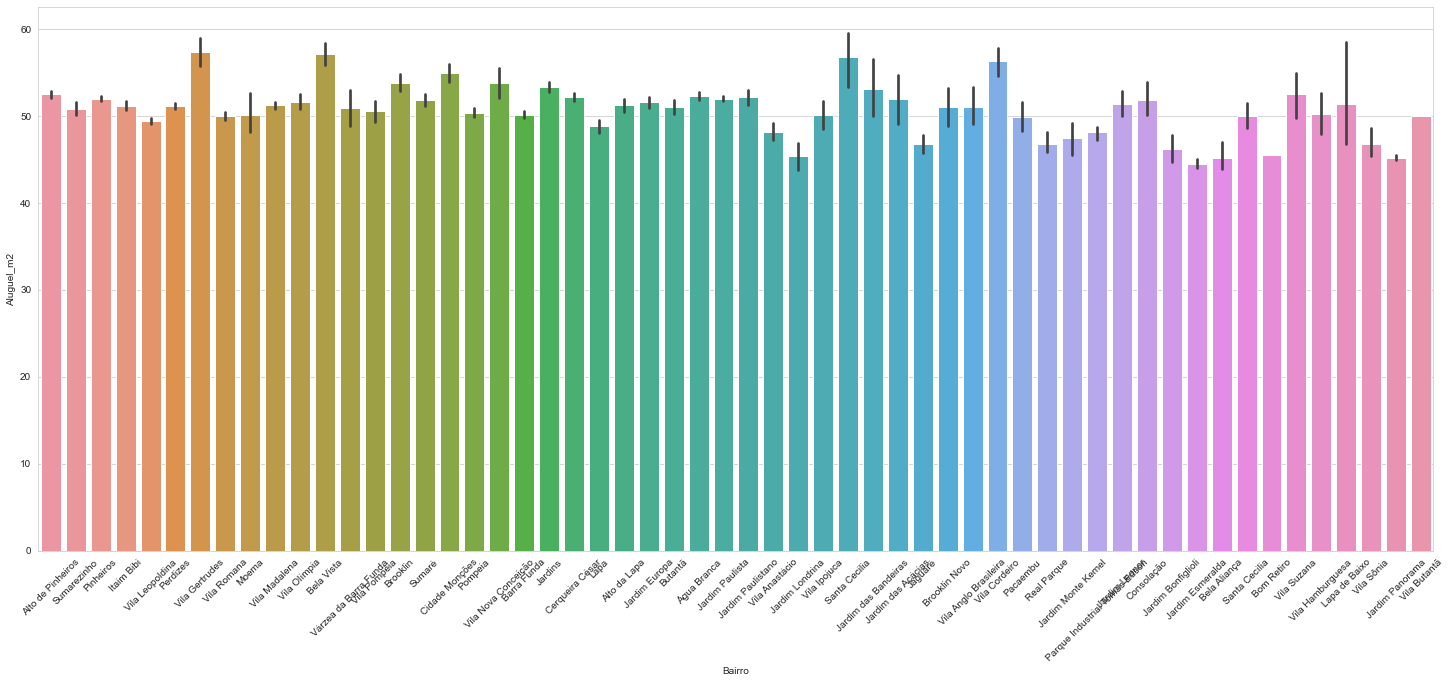

In [36]:
plt.figure(figsize=(25,10))
sns.barplot(x = df_alog['Bairro'], y = df_alog['Aluguel_m2'])
plt.xticks(rotation=45)